Davies-Bouldin Index: 0.7102764046737506


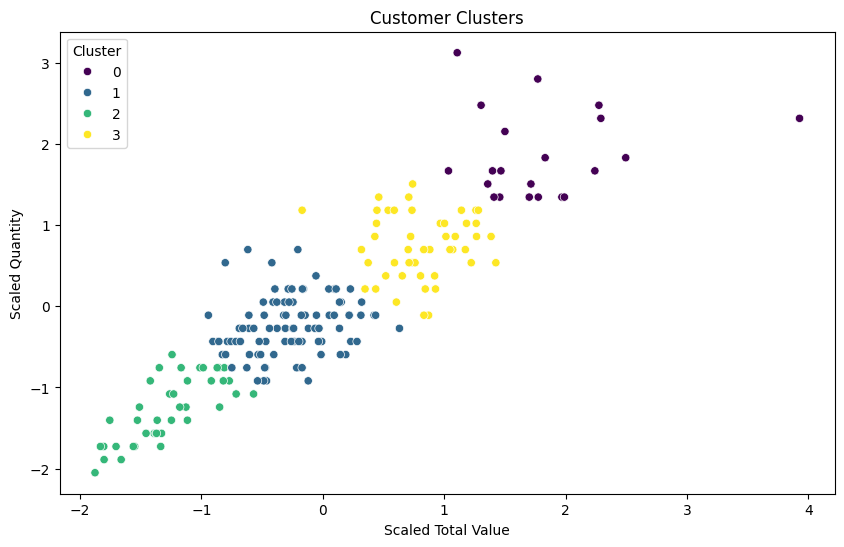

''

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\Dell\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\Dell\Downloads\Transactions.csv")

# Merge datasets
customer_transactions = transactions.groupby("CustomerID").agg({"TotalValue": "sum", "Quantity": "sum"}).reset_index()
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left").fillna(0)

# Feature selection and scaling
features = customer_data[["TotalValue", "Quantity"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Clusters")
plt.xlabel("Scaled Total Value")
plt.ylabel("Scaled Quantity")
plt.legend(title="Cluster")
plt.show()

from fpdf import FPDF

# Create a PDF report for clustering results
class ClusteringPDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(0, 10, "Customer Segmentation Report", align="C", ln=True)
        self.ln(10)
    
    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

# Initialize the PDF
pdf = ClusteringPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Add Clustering Details
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Clustering Details:", ln=True)
pdf.ln(5)
content = [
    "1. The clustering algorithm used: K-Means Clustering.",
    "2. The number of clusters: 4.",
    "3. Evaluation metric (Davies-Bouldin Index): Calculated value provided in the output.",
    "4. Features used: Scaled TotalValue and Quantity.",
    "5. Results: The clustering results have been saved in 'Customer_Clusters.csv'."
]
for line in content:
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, line)
    pdf.ln(2)

# Save the PDF file
clustering_pdf_path = r"C:\Users\Dell\Downloads\\Customer_Clustering_Report.pdf"
pdf.output(clustering_pdf_path)

